In [1]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl

from matplotlib.gridspec import GridSpec
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from collections import Counter


algorithm = 'ComplementNB'
acc = '76'
dataset_dir = 'sentiment140'
# dataset_dir = 'imdb'
# dataset_dir = 'coronaNLP'


In [12]:


n_gram = (1, 2)
vectorizer_path = f"./vectors/vectorizer_{dataset_dir}_{n_gram}.pkl"
model_path = f"./models/{algorithm}_{dataset_dir}_{acc}_{n_gram}.pkl"
df = pd.read_csv(f'./data/war-russian.csv', delimiter=',')
df = df.drop_duplicates()
df = df[['translate', 'sentiment']]
df['tweet'] = df['translate']

In [10]:

tfidf = joblib.load(vectorizer_path)
model = joblib.load(model_path)


In [13]:

X = df.tweet.fillna(' ')
X

0      @blacksmithvakul @nadin0127realti How?!How did...
1      In the Kyiv region, they continue to find buri...
2      @Inforsist output, classic from the war only o...
3      Ukraine, Mariupol, Heroic, 29 https://t.co/wbp...
4      @Rulbaraka @danidemocracy @zelenskyua @potus U...
                             ...                        
737    @Vwaldhoffer @pashacap @avakovarsen And what t...
738    #Russians #Russia #Ukraine Victory Day of Russ...
739    @Dayanat01 And this action received a sacred m...
740        Ukraine, we won.Zelensky, I congratulate you.
741    @Sercool_Off @the_ins_ru zakra his semicogryz ...
Name: tweet, Length: 741, dtype: object

In [14]:
X[4]

'@Rulbaraka @danidemocracy @zelenskyua @potus Ukraine can only smell a hole near the ass and then if Russia wants it'

In [15]:

tweets = X
num_of_tweets_analyzed = len(tweets)
y_pred = tfidf.transform(X)
y_pred

<741x402749 sparse matrix of type '<class 'numpy.float64'>'
	with 5748 stored elements in Compressed Sparse Row format>

In [16]:

predictions = model.predict(y_pred)
len(np.where(predictions==0)[0]), len(np.where(predictions==1)[0])

(368, 373)

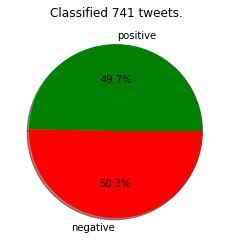

In [17]:

# saving tweets to csv
tweets.to_csv(f'./analysis/tweets-war2.csv')
# saving sentiment predictions to csv
np.savetxt(f'./analysis/predictions-war2.csv',
        predictions, delimiter=',', fmt=('%s'))
# adding sentiment column to the beginning
df = pd.read_csv(
    f'./analysis/predictions-war2.csv', header=None)
df.rename(columns={0: 'sentiment'}, inplace=True)
# save to new csv file
df.to_csv(
    f'./analysis/predictions-war2.csv', index=False)
# merging tweets and predictions
filenames = [f'./analysis/tweets-war2.csv',
             f'./analysis/predictions-war2.csv']
dfs = []
for filename in filenames:
    # read the csv, making sure the first two columns are str
    df = pd.read_csv(filename, header=None, converters={0: str, 1: str})
    # change the column names so they won't collide during concatenation
    df.columns = [filename + str(cname) for cname in df.columns]
    dfs.append(df)
# concatenate them horizontally
merged = pd.concat(dfs, axis=1)
# write it out
merged.to_csv(
    f"./analysis/merged-war2.csv", header=None, index=None)
df = pd.read_csv(f'./analysis/merged-war2.csv')
labels = ['negative', 'positive']
title_type = df.groupby('sentiment').agg('count')
type_labels = ['positive', 'negative']
type_counts = title_type.tweet.sort_values()
colors = ['g', 'r']
plt.subplot(
    aspect=1, title=f'Classified {num_of_tweets_analyzed} tweets.')
type_show_ids = plt.pie(type_counts, labels=type_labels,
                        autopct='%1.1f%%', shadow=True, colors=colors)
plt.savefig(f"./visuals/war2.png")
plt.show()
